## Métodos de Otimização: Métodos de procura multidimensional

### Gradiente Conjugado- Diferenças finitas

__Imports:__

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys, os

__Incialização:__

In [2]:
x =np.zeros(2 , dtype = 'float')

__Função Avaliada:__

In [3]:
def f(x):
    f = open("var.dat", "w")
    f.write("2\n")
    f.write(str(x[0])+'\n')
    f.write(str(x[1]))
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    return u

In [4]:
def f2(x, y):
    return 0.25*x**4-3.*x**3+11.*x**2-13.*x+0.25*y**4-3.*y**3+11.*y**2-13.*y

x1 = np.linspace(0, 6)
x2 = np.linspace(0, 6)

X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)

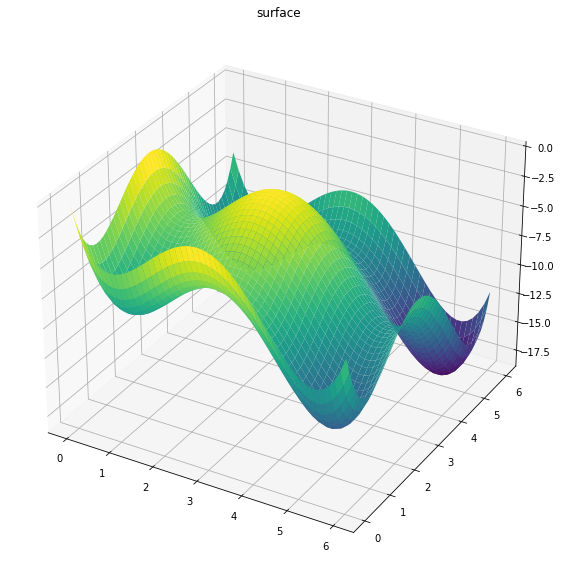

In [5]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

__Método:__

In [6]:
def grad(x):
    epsilon = 1.e-10
    
    xtmp=x.copy()
    xtmp[0]=xtmp[0]+epsilon
    G[0]=(f(xtmp)-f(x))/epsilon

    xtmp=x.copy()
    xtmp[1]=xtmp[1]+epsilon
    G[1]=(f(xtmp)-f(x))/epsilon
    
    return G

In [7]:
def direcao(G,gamma,dold):
    
    d = -G+gamma*dold
    
    return d

In [37]:
def coef_conj(G,Gold):
    eps = 1.e-10
    numerador = np.dot(G,G)
    denominador = np.dot(Gold,Gold)
    print(numerador)
    print(denominador)
    
    if numerador<eps or denominador<eps:
        flag = 1
        print(flag)
        return flag
        
    else:
        # Fletcher-Reeves
        gamma = numerador/denominador
        print(gamma)
        return gamma

In [40]:
G =np.zeros(2 , dtype = 'float')
Gold =np.zeros(2 , dtype = 'float')
xold =np.zeros(2 , dtype = 'float')
xnew =np.zeros(2 , dtype = 'float')
d =np.zeros(2 , dtype = 'float')
dold =np.zeros(2 , dtype = 'float')

layout = "{0:.5f}"

#chute incial:
x1 = 3
x2 = 3

alfa=0.1; kmax=2; k=0
xold[0]=x1; xold[1]=x2; F0 = f(xold)
print(layout.format(xold[0])+" "+layout.format(xold[1])+" "+layout.format(F0))
flag=0

# Primeira iteração k=0

# Calculo Gradiente
G = grad(xold)

#Calculo da direção
gamma = 0
d = direcao(G,gamma,dold)

# Processo iterativo
xnew=xold+alfa*d

#Atualiza xold
xold = xnew.copy()

#Calculo da função
F = f(xnew)
print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))

while k < kmax:
    k += 1
    
    # Calculo Gradiente
    Gold = G.copy()
    G = grad(xold)
    
    #Calculo gamma
    gamma = coef_conj(G,Gold)
    
    if flag==0:
        #Calculo da direção
        dold = d.copy()
        d = direcao(G,gamma,dold)

        # Processo iterativo
        xnew=xold+alfa*d

        #Atualiza xold
        xold = xnew.copy()

        #Calculo da função
        F = f(xnew)
        print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))

3.00000 3.00000 -1.50000
3.09999 3.09999 -1.74992
4.494606677728625
1.9996006706076046
2.2477521356115973
3.47465 3.47465 -3.55040
21.334827888264925
4.494606677728625
4.746761934471784
5.57969 5.57971 -17.79014


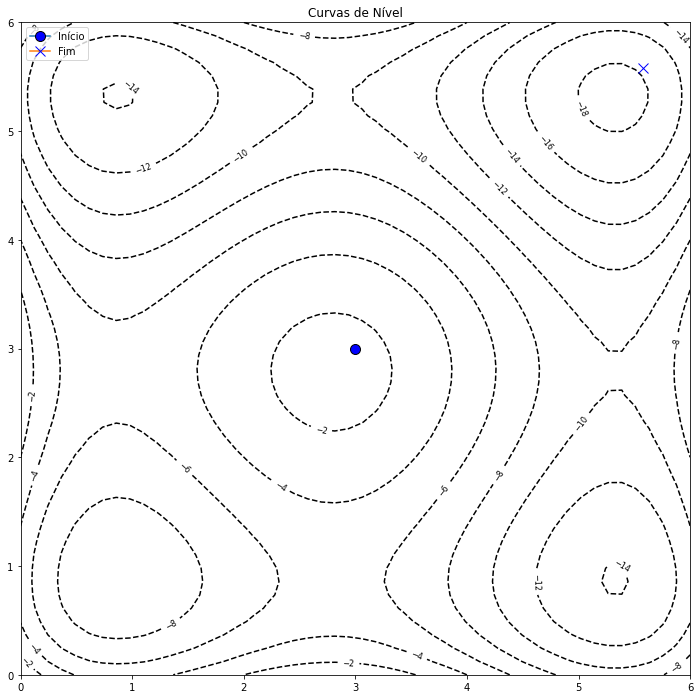

In [41]:
plt.figure(figsize=(12,12))
CS = plt.contour(X1, X2, Z,10,colors='k')
plt.clabel(CS, inline=0.5, fontsize=8)
plt.title('Curvas de Nível')
plt.plot(x1, x2, marker="o", markersize=10, markeredgecolor="k", markerfacecolor="b")
plt.plot(xnew[0], xnew[1], marker="x", markersize=10, markeredgecolor="b", markerfacecolor="b")
plt.legend(['Início', 'Fim'], loc='upper left')
plt.show()